# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [52]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [53]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [54]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0,10,20]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,3366,5403,12974,4400,5977,1744
2,17546,4519,4602,1066,2259,2124


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** Ok, i've chosen 3 different samples[0,10,20].Customer[0] have a good consumption of milk, really above the mean(9656>5796), but a low in Frozen(214<3017), it can be an Italian restaurant that produce it's own cheese and cares about fresh food.

Customer[1] presents Detergents_Paper(5977>2881) and Grocery(12974>7951) are above the mean, since both don't work together, i might say it's a local market which sells grocery itens and toilet paper.

Customer[2] have a high volume of Fresh(17546>12000) and Delicatessen(2124>1524), so it might be a bakery or a local fast food restaurant.

**Just note that using the median/quartiles would be much more appropriate than mean, since the median/quartiles are more robust to outliers, which we have here.**

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [55]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Delicatessen', axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data,data['Delicatessen'].values,test_size=0.25, random_state=10)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=10)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print "The score from Decision Tree Regressor is:"
print score

# Frozen 0.0548481103591
# Milk -0.442085754637
# Fresh -0.379170072447
# Grocery 0.723800832652
# Detergents_Paper 0.494381677643
# Delicatessen -10.5626610325

The score from Decision Tree Regressor is:
-10.5626610325


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** Delicatessen, the score for Delicatessen was -10.56(R Square Score), the model prediction is worse than a straigh line model.

Grocery score is 0.7238.

A highly predictable feature is not good for the model, because it's important to have key features, that means features that contribute in a unique way to determine the customer segment.

If added a new feature called Total_Spending, which is the sum of all other features, probably it's gonna be an easy feature to predict, probably score 1, because it's just the sum of all other features.However it doesn't help the Decision Tree Regressor.

With that in mind, Delicatessen is an important feature to keep, because it helps to predict the customer's spending habit.

**Spot on! Grocery can be derived from the other features in this dataset and Deli is an independent feature. Thus if we have a high r^2 score(high correlation with other features), this would not be good for identifying customers' spending habits(since the customer would purchase other products along with the one we are predicting, as we could actually derive this feature from the rest of the features). Therefore a negative / low r^2 value would represent the opposite as we could identify the customer's specific behavior just from the one feature.**

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

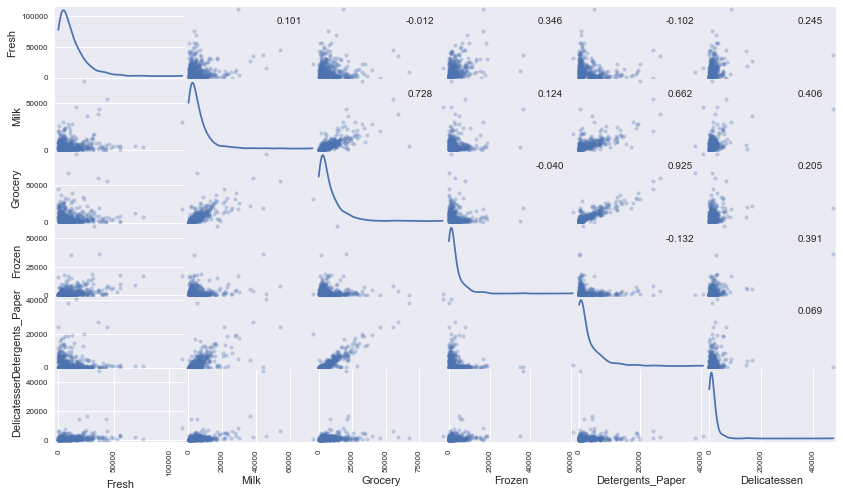

In [56]:
# Produce a scatter matrix for each pair of features in the data
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** 

Delicatessen,Milk and Fresh are really random, they don't exhibit no degree of correlation.
And that's confirmed with the score from R^2.(Delicatessen -10.5626610325,Fresh -0.379170072447 and Milk -0.442085754637)

Grocery, Frozen and Detergents_Paper seems to have some linear correlation.
(Grocery 0.723800832652, Frozen 0.0548481103591 and Detergents_Paper 0.494381677643)

The data is not normally distributed since most points lie near the origin.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

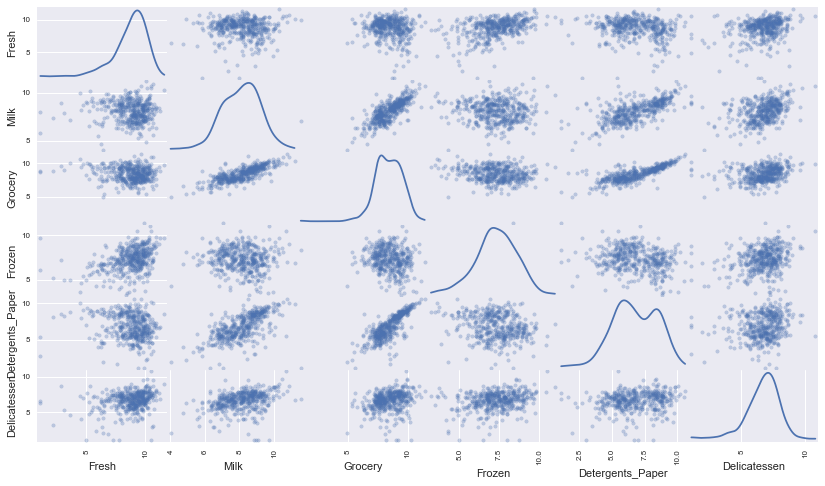

In [57]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [58]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
2,9.772581,8.416046,8.434246,6.971669,7.722678,7.661056


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


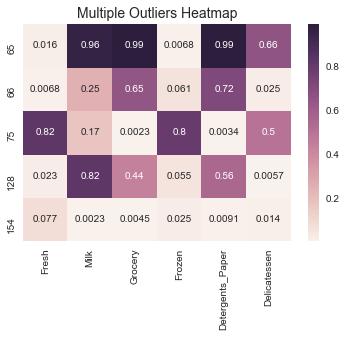

In [59]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
# outliers  = [38,65,66,75,95,96,109,112,128,137,142,154,161,177,184,187,203,204,218,233,237,
#            285,289,338,356,402,420]

outliers  = [38,57,65,66,75,81,86,95,96,98,109,128,137,142,145,154,161,171,175,183,184,187,193,
            203,218,233,264,285,289,304,305,325,338,343,353,355,356,357,412,420,429,439]

#outliers = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

# Heatmap using percentiles to display outlier data
import matplotlib.pyplot as plt
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = percentiles.iloc[[65, 66, 75, 128, 154]]
plt.title('Multiple Outliers Heatmap', fontsize=14)
heat = sns.heatmap(percentiles, annot=True)
display(heat)

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** There are 5 outliers in more than one features.[65,66,75,128,154]

I think all outliers should be removed from the dataset.

Because usually outliers in an unsupervised learning algorithm can lead to a model that doesn't generalize well.
Models that are based on maximazing the gap or techniques that focus on variance are the most affected.

**Removing all data points considered outliers according to Tukey's method may be a bit extreme in this case. We don't have too many data points to start with, and removing many of them may deprive us of meaningful information regarding how the features are distributed across clients.**

**As outlier removal is a tender subject, as we definitely don't want to remove too many with this small dataset. But we definitely need to remove some, since outliers can greatly affect distributions, influence a distance based algorithm like clustering and/or PCA. One cool thing about unsupervised learning is that we could actually run our future analysis with these data points removed and with these data points included and see how the results change(as I think you have done, awesome!).**

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

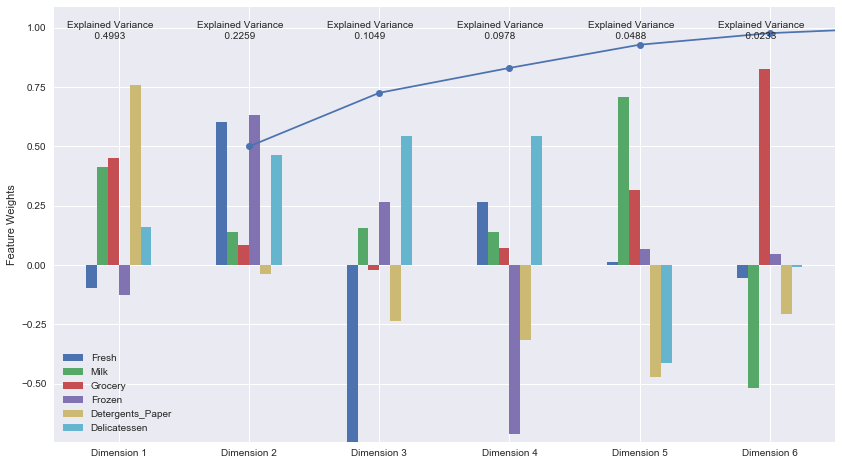

In [77]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

import matplotlib.pyplot as plt
x = np.arange(1, 7)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The first and second PCA are the ones which the variance are the highest, which means they are ranked higher and we should focus on them to train our model.

In total these 2 first PCA represent the 72.52% of the total variance and the first four PCA represent 92.79% of the variance.
Checking the Dimension 1, Detergents and Paper are the one with higher variance(positive-weighted feature), this means that Detergents and Paper is a a good feature for an unsupervised model.
Then there are Milk and Grocery, which like i mentioned before, both are related but have a good variance.(Positive-weighted features)

- First Dimension: 49.93% of Explained Variance
- Second Dimension: 22.59% of Explained Variance
- Third Dimension: 10.49% of Explained Variance
- Fourth Dimension: 9.78% of Explained Variance

Sum of All Dimensions: 100% of Explained Variance.

Dimension 1:
- Detergents and Paper, around 0.78(Weigthed Feature)
- Grocery, around 0.42(Weigthed Feature)
- Milk, around 0.4(Weigthed Feature)

Most likely to be a 'Hotels/Restaurants/Cafes'  business.

Detergents and Paper/Grocery and Milk, seem to be HoReCa features.

Dimension 2:
- Frozen, around 0.6(Weigthed Feature)
- Fresh, around 0.6(Weigthed Feature)
- Delicatessen, around 0.5(Weigthed Feature)

In my opinion, Dimension 2 is a 'Hotels/Restaurants/Cafes' business.
It has Frozen/Fresh/Delicatessen, i could argue about the Delicatessen, but i think Frozen and Fresh have a bigger weight.

Dimension 3:
- Fresh, around -0.8(Weigthed Feature)
- Delicatessen, 0.6(Weigthed Feature)

A Retail Business, Delicatessen is the highest positive feature.

Dimension 4:
- Frozen, around -0.78(Weigthed Feature)
- Delicatessen, 0.5(Weigthed Feature)

A Retail Business, Delicatessen is the highest positive feature.

**When it comes to discussing the principal components, keep in mind that:**

- A large positive weight (or loading) for a feature indicates a positive correlation between that feature and the principal component.
- A large negative loading indicates a negative correlation between that feature and the principal component.
- A loading close to zero indicates there is no correlation between the feature and the principal component.
- Features with high loadings of the same sign present a positive correlation for the observations with high absolute values of that principal component.
- Features with high loadings of different signs present a negative correlation for the observations with high absolute values of that principal component.

**As always remember that the sign of the features in the component really wouldn't matter too much, since if we multiply the entire PCA dimension by -1 it would still be the same PCA component**

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [61]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7793,-0.6604,-0.8247,1.6580,0.0903,-0.4808
1,2.1793,0.5069,0.8243,-1.0031,-0.4516,0.3107
2,0.9509,0.6209,-0.4557,0.7648,-0.6039,-0.4094


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [62]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca = pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [63]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7793,-0.6604
1,2.1793,0.5069
2,0.9509,0.6209


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

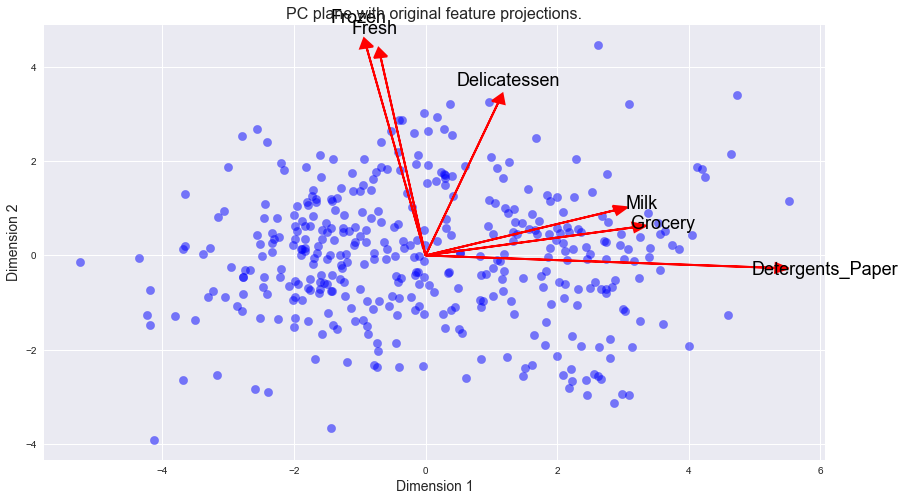

In [64]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:** Detergents_Paper, Grocery and Milk are the most strongly correlated to the first PCA ,The second PCA: Frozen, Fresh and Delicatessen are the features associated.

Both observations agree with graphic from Implementin PCA, these features at their Dimensions were the highest bars.

Dimension 1:
- 1)Detergents_Paper
- 2)Grocery
- 3)Milk

Dimension 2:
- 1)Fresh
- 2)Frozen
- 3)Delicatessen

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-Means is fast at computacional time, if it's choosen the right inicial spots, it can converge quickly.
It's easy to interpret, since it's easy to look at a plot and through the colors that represent a group, we can determineate easily what group that point belongs.
(Hard Assigment)

Gaussian Mixture Model are evenly distributed, so the covariance is low between the centroids and the data in it.
It works similar to EM algorithm, so each data has a probability to belongs to a certain group.
(Soft Assigment)

Since we're developing a model for customer segments, i think K Means is the best algorithm, because after applying the logarithm technique, the features has become normally distributed and after applying PCA, the graph from Dimension 1 and Dimension 2 seems to be defined(3 features associated with each PC, and axis are almost perpendicular to each other).

**Note: Intuitively, K-Means assumes that the clusters of data are contained spheres. On the other hand, GMM assumes the clustered data are elliptical, thus is more flexible. We can also consider GMM as a generalization of k-means clustering by accounting for the covariance and centres of the latent Gaussian.**

**An important point about both K-Means and GMM is that for both algorithms the number of clusters (or Gaussian distributions) must be defined beforehand - which is not the case for hierarchical clustering, for instance.
One way to deal with this, as we see later on in this notebook, is to test several different numbers of clusters and saving the best result among them, according to a metric such as the silhouette score.**

**Speed:**

**K-Mean much faster and much more scalable
GMM slower since it has to incorporate information about the distributions of the data, thus it has to deal with the co-variance, mean, variance, and prior probabilities of the data, and also has to assign probabilities to belonging to each clusters.**
**Structure:**

**K-Means straight boundaries (hard clustering)
GMM you get much more structural information, thus you can measure how wide each cluster is, since it works on probabilities (soft clustering)**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [65]:
from sklearn.cluster import KMeans
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=10).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data,preds)
print score
# n_clusters=2 score= 0.447157742293
# n_clusters=3 score= 0.36398647984
# n _clusters=4 score= 0.331150954285
# n _clusters=5 score= 0.35227346044
# n _clusters=6 score= 0.362761015127
# n _clusters=7 score= 0.354496269756
# n _clusters=8 score= 0.377229204391
# n _clusters=9 score= 0.365852452082
# n _clusters=10 score= 0.349565221424

0.447157742293


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** The best number of clusters is 2, since got the best score 0.447157742293

- n_clusters=2 score= 0.447157742293
- n_clusters=3 score= 0.36398647984
- n_clusters=4 score= 0.331150954285
- n_clusters=5 score= 0.35227346044
- n_clusters=6 score= 0.362761015127
- n_clusters=7 score= 0.354496269756
- n_clusters=8 score= 0.377229204391
- n_clusters=9 score= 0.365852452082
- n_clusters=10 score= 0.349565221424

**Note: If we keep increasing the number of clusters , the Silhouette score may rebound to approach 1, but a large number of clusters does not really make sense. Given this small data size, we usually do not want to have too many clusters. So dividing data into two clusters is quite reasonable here.**

Without the removing the outliers, the best number of cluster is still 2, score is 0.41...

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

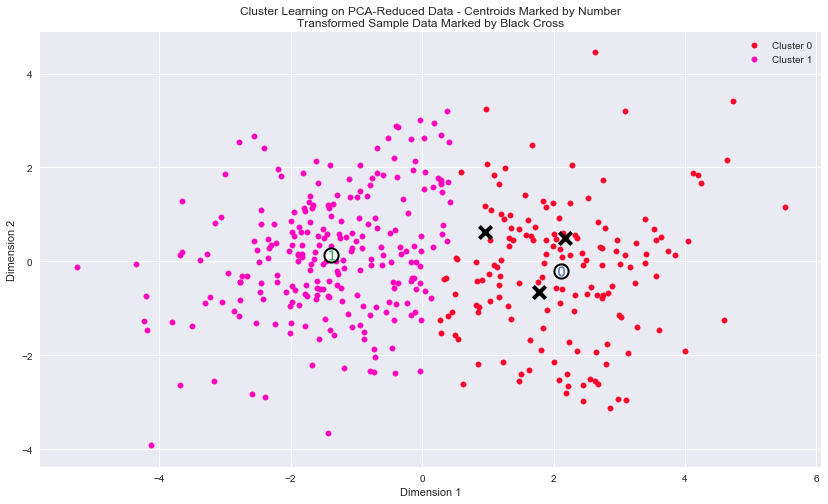

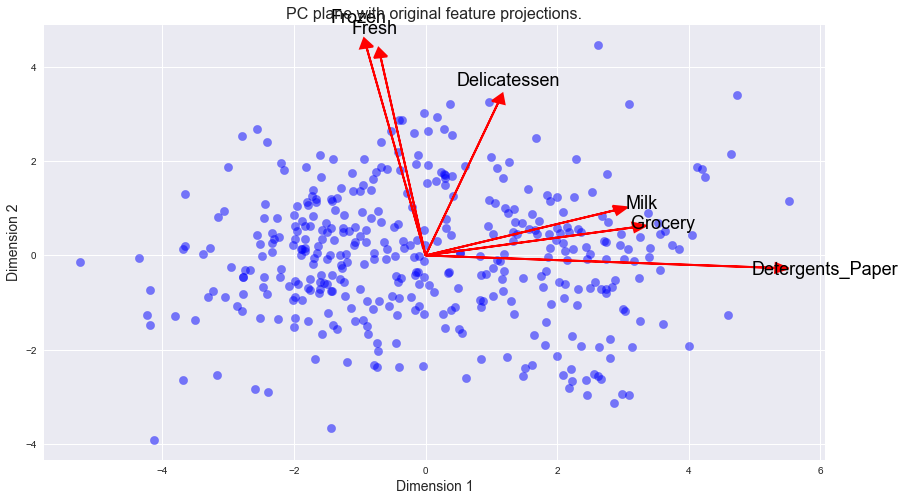

In [66]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)
vs.biplot(good_data, reduced_data, pca)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0
Segment 1,9451.0,1938.0,2449.0,2200.0,307.0,771.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


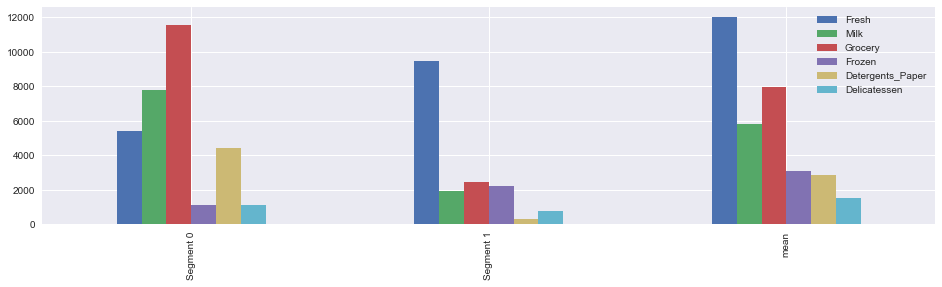

In [70]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

display(data.describe())

true_centers = true_centers.append(data.describe().ix['mean'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
- A customer who is assigned to Cluster 0(Segment 0) should best identify with the establishment **retail** represented by the feature set of Segment Milk, Grocery,Delicatessen and Detergents_Paper.


- A customer who is assigned to Cluster 1(Segment 1) should best identify with the establishments **HoReCa(Hotel, Restaurants and Cafe)** represented by the feature set of Segment Fresh and Frozen.


- Fresh mean (12000) closer to **Segment 1(Below mean)(9451)**, Segment 0(5424).
- Milk mean(5796) closer to **Segment 0(Above mean)(7780)**, Segment 1(1938).
- Grocery mean (7951) closer to **Segment 0(Higher than mean)(11532)**, Segment 1(2449).
- Frozen mean (3071) closer to **Segment 1(Below mean)(2200)**, Segment 0(1123).
- Detergents_Paper mean (2881) closer to **Segment 0(Above mean)(4444)**, Segment 1(307).
- Delicatessen mean(1524) closer to **Segment 0(Below mean)(1136)**, Segment 1(771).

Summary:

Segment 0:
- Higher than mean: Milk, Grocery and Detergents_Paper.

Segment 1:
- Low relative value in Detergents_Paper, Grocery and Milk.
- Closer to mean: Fresh and Frozen

**So, whether a customer belongs to one segment or another seems to depend almost exclusively on Dimension 1. And what does Dimension 1 represent?**

Dimension 1 represented by Milk, Grocery and Detergents_Paper.(Biplot Graph / Highest Bars)Positive Weigth


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [78]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
display(true_centers)

display(samples)

display(data.describe())

for i, pred in enumerate(sample_preds):
  print "Sample point", i, "predicted to be in Cluster", pred
  print 'The distance between sample point {} and center of cluster {}:'.format(i, pred)
  print (samples.iloc[i] - true_centers.iloc[pred])

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.000000,7780.000000,11532.000000,1123.000000,4444.000000,1136.000000
Segment 1,9451.000000,1938.000000,2449.000000,2200.000000,307.000000,771.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,3366,5403,12974,4400,5977,1744
2,17546,4519,4602,1066,2259,2124


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Sample point 0 predicted to be in Cluster 0
The distance between sample point 0 and center of cluster 0:
Fresh               7245.0
Milk                1876.0
Grocery            -3971.0
Frozen              -909.0
Detergents_Paper   -1770.0
Delicatessen         202.0
dtype: float64
Sample point 1 predicted to be in Cluster 0
The distance between sample point 1 and center of cluster 0:
Fresh              -2058.0
Milk               -2377.0
Grocery             1442.0
Frozen              3277.0
Detergents_Paper    1533.0
Delicatessen         608.0
dtype: float64
Sample point 2 predicted to be in Cluster 0
The distance between sample point 2 and center of cluster 0:
Fresh               12122.0
Milk                -3261.0
Grocery             -6930.0
Frozen                -57.0
Detergents_Paper    -2185.0
Delicatessen          988.0
dtype: float64


**Answer:** Cluster 0 :[Milk,Grocery,Detergents_Paper,Delicatessen] Cluster 1: [Fresh,Frozen]

Checking Customer Segment based on Question 8:

Sample Point[0] has a high value in Fresh and Milk values, it's likely to belong to Cluster 0.(Retail Business)

- Fresh value in sample[0] is closer to segment 1,however all other features values from sample[0] are similar to segment 0 values.

Sample Point[1] presents a high value in Grocery, Frozen and Detergents_Paper, most likely belongs to Cluster 0.(Retail Business)

- Fresh,Milk,Grocery,Detergents_Paper and Delicatessen tends to be closer to Segment 0.

Fresh and Frozen are the features that standout in Sample Point[2], so i would say it's Cluster 1.(HoReCa Business)

- Fresh,Milk,Grocery and Detergents_Paper indicate Segment 1.

All predictions are in Cluster 0.

The only missclassification i did is Sample Point[2], it's the data point more balanced between features values from Segment 0 and 1.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**The change will affect more positively the Fresh, Milk and Grocery features, because the need for a shorter delivery service is more important than Frozen, Detergents,Paper and Delicatessen.

If the A/B tests are based on Segment 0(retail), it's more likely that will be more successful.

However , since we got 2 clusters, i would perform 2 separate A/B test.
One for Segment 0 and another for Segment 1, because we cannot be sure, but probably Segment 0 represent a customer segment,in this case Segment 0 is likely to be a retail business and Segment 1 a HoReCa business.

To successfully determine A/B test, we could run a train/test split with cross validation(perhaps 5 groups), which means to divide the A/B groups in 2 groups(test and train)(20%Test,80%Train) 5 times, we're gonna run this test 6 times. 5 times we're going to split and score the result with 2 groups(A/B portion) and one last time with hole group.

The score will be the mean between the validations runs.

Train group >> Control Set


Test group >> Variation Set

**You capture the main point here: any test performed on the customers, including an A/B test, must take into account the fact that there are two different customer segments. Mixing the segments may lead to undesirable results in the test.**

**For instance, suppose one segment would welcome a change in delivery system, while the second wouldn't. Suppose also that in the A/B test, most of the customers selected for a trial change are from the second segment. One could then conclude that customers as a whole would oppose a change in delivery system, which would not be true.**

**Really not too sure that we need to run this 6 times, but you do have the right ideas here. We should run separate A/B tests for each cluster independently. As if we were to use all of our customers we would essentially have multiple variables(different delivery methods and different purchasing behaviors).**

**The whole distributor can conduct an AB test in each of the two segments. That is, for segment 0, the distributor can randomly split the customers in this segment into two, and try the 3 day distribution to the experiment group, while for segment zero control group, the distributor continues with the current 5 day schedule. The wholesale distributor can then test whether there is a statistically significant difference in a metric of their choice (e.g cost savings) between the control and experiment groups. From the A/B test they can decide whether to launch the three day delivery system in segment 0. The wholesale distributor can then do another A/B test for segment 1, and determine whether to launch the change for segment 1.**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** We have 2 customer segment data, segment 0 and segment 1.

The new 10 customers can be assigned to be from segment 0 or 1, by analysing their consumption in Milk, Grocery and Detergents_Paper(Segment 0) and the others produts(Segment 1).

Since we can assign labels through predictions from k Means model, let's say Segment 0 is a retail business and Segment 1 is a HoReCa business, this data can know be input in a supervised learner, and with that it can be predicted this 10 new customers segments.

Segment 0:
- Higher than mean: Milk, Grocery and Detergents_Paper.
Segment 1:
- Low relative value in Detergents_Paper, Grocery and Milk.
- Closer to mean: Fresh and Frozen

**This is a good start. Instead of assigning the customers by analyzing their consumption, we can also use the clustering result as labels and consumption as features to train a model, from which the consumption of the 10 new customers can serve as input to the model. Then we can predict their segment from the supervised learning framework.**

**Note that we can also use our unsupervised learner to classify new customers based on their predicted consumption habits, much as we predicted the segment of each sample customer in the notebook. Alternatively, we can use the engineered feature (the cluster each customer belongs to) as a predictor in a supervised learning task.**

**Nice idea to use the cluster assignment as new labels. Another cool idea would be to use a subset of the newly engineered PCA components as new features(great for curing the curse of dimensionality). PCA is really cool and seem almost like magic at time. Just wait till you work with hundreds of features and you can reduce them down into just a handful. This technique becomes very handy especially with images.**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

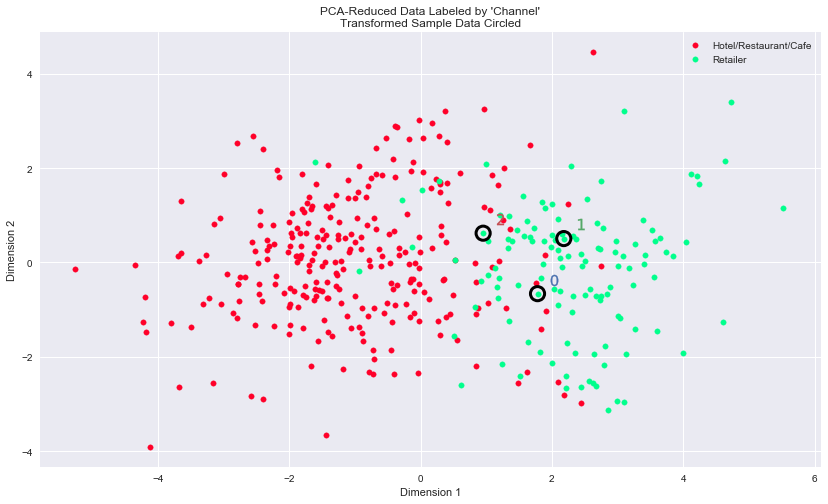

In [69]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Through the silhouette score, the best number of cluster matches, the number is 2.

K means algorithm is the clustering algorithm, checking both graphs they look similar, but some datapoints  from 'HoReCa' are misclassified, near the to cluster 1 centroid.

No customer segments would be classified as purely as 'Retailers' or 'HoReCa'.


All 3 samples are retailers, and at my first analysis i thought that just customer[1] would be a retailer, and customer[0] and customer[2] would be restaurants or 'HoReCa'.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.